In [1]:
%load_ext autoreload
%autoreload
from pyScoreParser import data_class, xml_utils, utils, feature_utils
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd # should be notebook directory

/data/projects/PerformanceDataTutorial/3_pyScoreParser


In [3]:
file_root = '../assets/Beethoven_Sonata_8_2/'
xml_file = Path(file_root) / 'score.xml'
midi_files = [el for el in Path(file_root).glob('*.mid') if 'score' not in el.name]

In [4]:
piece_data = data_class.PieceData(xml_path=xml_file,
                                  perform_lists=midi_files)

available_pairs: 1526
Number of mismatched notes:  0
Matched:1531 (Diff(nonzero_score):98), 
 match after cleaning:1531 (diff:0)
Number of Matched Notes: 1531, unmatched notes: 98
available_pairs: 1454
Number of mismatched notes:  21
Matched:1460 (Diff(nonzero_score):169), 
 match after cleaning:1442 (diff:18)
Number of Matched Notes: 1442, unmatched notes: 187
available_pairs: 1536
Number of mismatched notes:  14
Matched:1542 (Diff(nonzero_score):87), 
 match after cleaning:1532 (diff:10)
Number of Matched Notes: 1532, unmatched notes: 97


In [5]:
performance = piece_data.performances[0]

In [6]:
performance.midi_path

PosixPath('../assets/Beethoven_Sonata_8_2/Ashkenazy, Vladimir.mp3_repem.mid')

In [7]:
perform_notes = performance.midi_notes

In [8]:
perform_notes[0]

Note(start=0.832292, end=2.944792, pitch=60, velocity=59)

### make piano roll with perform_notes

In [9]:
matched_idx = performance.match_between_xml_perf

In [11]:
def note_to_pixel(note, frame_per_second=50):
    # convert note into array index
    onset_x = np.rint(note.start*frame_per_second)
    offset_x = np.rint(note.end*frame_per_second)
    y = note.pitch - 21
    return dict(x_start=onset_x, x_end=offset_x, y=y)

In [12]:
note_to_pixel(perform_notes[0])

{'x_start': 42.0, 'x_end': 147.0, 'y': 39}

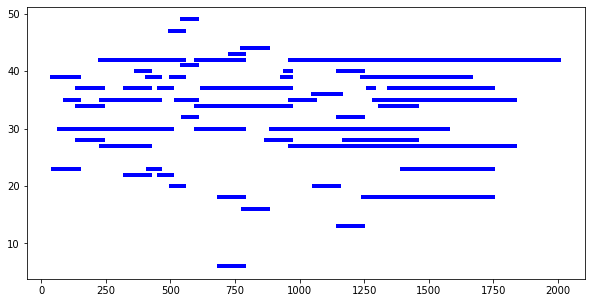

In [13]:
draw_range = 30 # let's draw first 30 seconds
figure = plt.figure(figsize=(10,5))
for note in perform_notes:
    if note.start < draw_range:
        arr_dict = note_to_pixel(note)
        # plt.hlines(arr_dict['y'], [arr_dict['x_start'], arr_dict['x_end']])
        plt.plot([arr_dict['x_start'], arr_dict['x_end']], [arr_dict['y'], arr_dict['y']], linewidth=4, color='b')

we will paint aligned notes with blue, and non-aligned notes with red

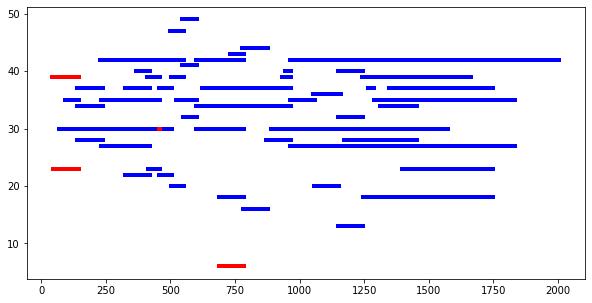

In [14]:
figure = plt.figure(figsize=(10,5))
for n, note in enumerate(perform_notes):
    if note.start < draw_range:
        if n in matched_idx:
            color = 'b'
        else:
            color = 'r'
        arr_dict = note_to_pixel(note)
        # plt.hlines(arr_dict['y'], [arr_dict['x_start'], arr_dict['x_end']])
        plt.plot([arr_dict['x_start'], arr_dict['x_end']], [arr_dict['y'], arr_dict['y']], linewidth=4, color=color)

In [15]:
for pair in performance.pairs:
    if pair == []:
        continue
    if pair['midi'].start >30:
        measure_number = pair['xml'].measure_number
        break
print(measure_number)

8


In [16]:
from music21 import converter

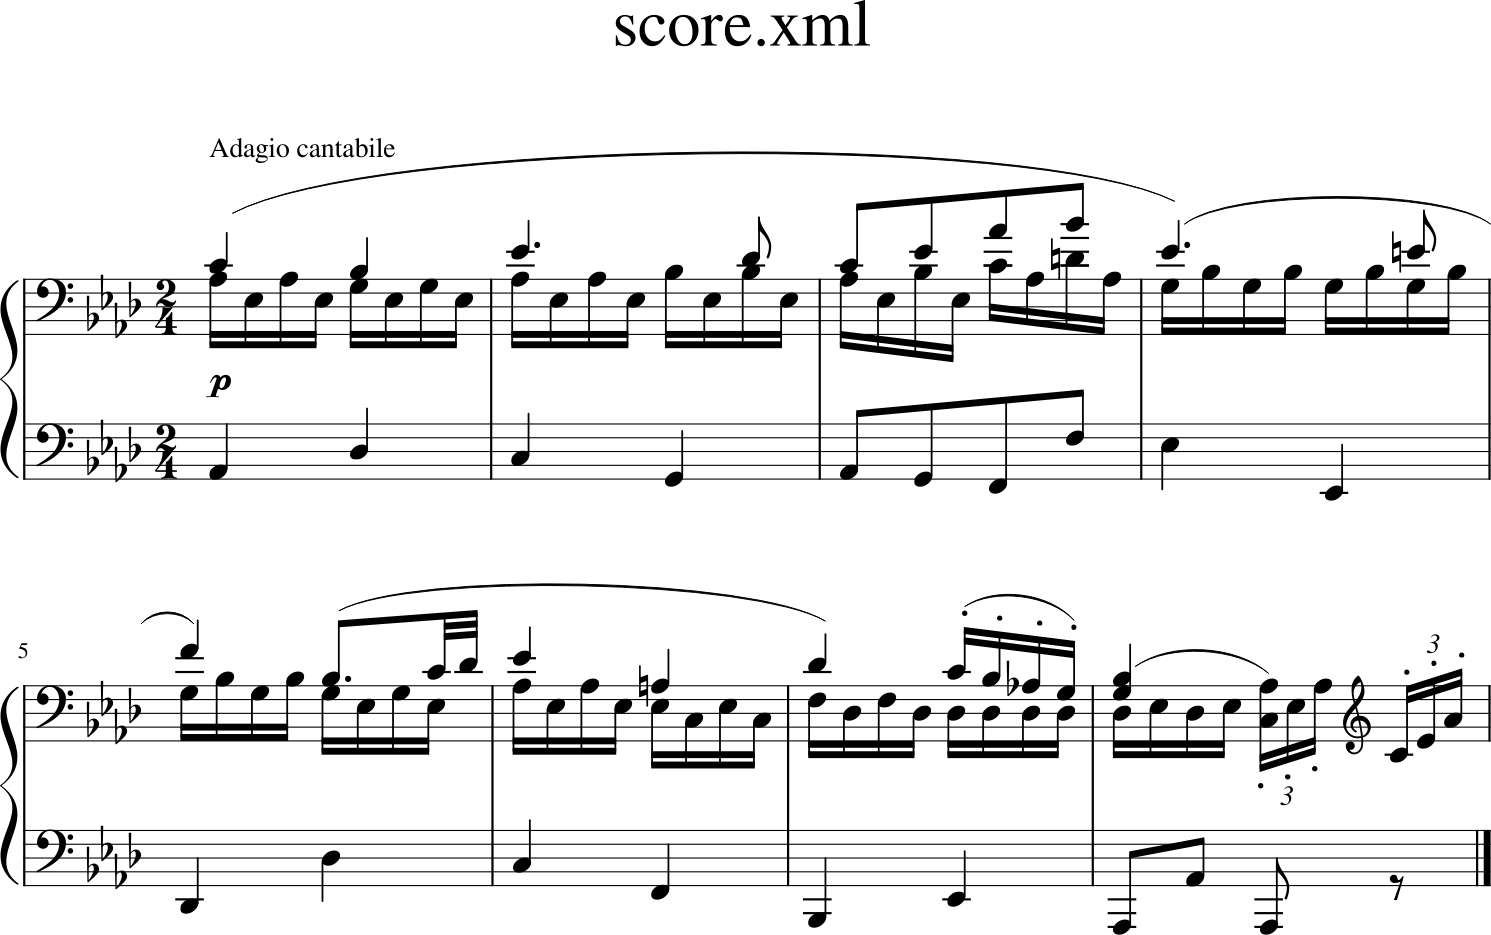

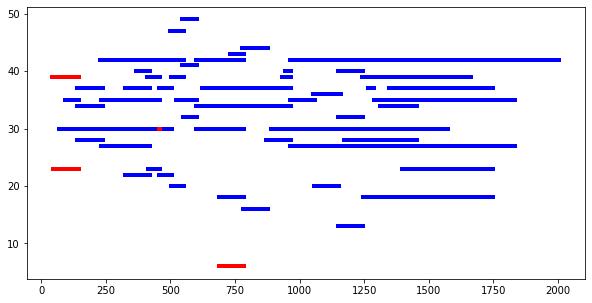

In [17]:
music_obj = converter.parse(piece_data.meta.xml_path)
music_obj.measures(0,8).show()
figure = plt.figure(figsize=(10,5))
for n, note in enumerate(perform_notes):
    if note.start < draw_range:
        if n in matched_idx:
            color = 'b'
        else:
            color = 'r'
        arr_dict = note_to_pixel(note)
        # plt.hlines(arr_dict['y'], [arr_dict['x_start'], arr_dict['x_end']])
        plt.plot([arr_dict['x_start'], arr_dict['x_end']], [arr_dict['y'], arr_dict['y']], linewidth=4, color=color)

In [18]:
import IPython.display as ipd
import librosa

In [19]:
y, sr = librosa.load('../assets/Beethoven_Sonata_8_2/Ashkenazy, Vladimir.mp3', duration=30)
ipd.Audio(y, rate=sr)

/home/tgkwon/.local/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [20]:
from music21 import midi

mf = midi.MidiFile()
mf.open(str(performance.midi_path)) # path='abc.midi'
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')


In [21]:
def play_midi(file_path):
    mf = midi.MidiFile()
    mf.open(file_path)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    sp = midi.realtime.StreamPlayer(s)
    sp.play()

In [22]:
play_midi(performance.midi_path)

pygame 2.1.2 (SDL 2.0.16, Python 3.9.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5007:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM default


error: ALSA: Couldn't open audio device: No such file or directory